# Notebook I - Climate Regime

In [1]:
# '''import supporting libraries'''
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# import os
# try:
#     from osgeo import gdal
# except:
#     import gdal    
# import sys
# from time import time as timer
import xarray as xr
# import rioxarray as rio

# gdal.UseExceptions()

import glob
import numpy as np

In [2]:
# branch version tag
revpy='v21'     # pyaez (repo version) tag
revpykg='v21pv' # parallelized vectorized kerrie version tag
domain='china'  # input domain

work_dir = r'C://Users/kerrie/Documents/01_LocalCode/repos/PyAEZ/'
out_path = work_dir+r'pyaez2.1/pyaez2.1_parvec/comparison_plots/'

gaezdir=r'C://Users/kerrie/Documents/02_LocalData/gaezv4_outputs/'  # dir to gaez rst files
pyaezdir=work_dir+r'pyaez2.1/pyaez2.1_2023OCT23/NB1outputs/'        # dir to pyaez (repo version) tif files
parvecdir=work_dir+r'pyaez2.1/pyaez2.1_parvec/NB1outputs/'          # dir to kerrie's pyaez tif files

varnames=['ThermalClimate','ThermalZone','LGPt0','LGPt5','LGPt10','Tsum0','Tsum5','Tsum10','LGP',
        'LGPEquivalent','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']#'TProfile',


varinfo={'ThermalClimate':{'gaez':'mcl','pyaez':'ThermalClimate','parvec':'ThermalClimate','cmap':'gist_ncar_r','levels':12,'vmin':0,'vmax':12},
          'ThermalZone':{'gaez':'mc2','pyaez':'ThermalZone','parvec':'ThermalZone','cmap':'gist_ncar_r','levels':12,'vmin':0,'vmax':12},
          'LGPt0':{'gaez':'lt1','pyaez':'LGPt0','parvec':'LGPt0','cmap':'viridis','vmin':0,'vmax':366},
          'LGPt5':{'gaez':'lt2','pyaez':'LGPt5','parvec':'LGPt5','cmap':'viridis','vmin':0,'vmax':366},
          'LGPt10':{'gaez':'lt3','pyaez':'LGPt10','parvec':'LGPt10','cmap':'viridis','vmin':0,'vmax':366},
          'Tsum0':{'gaez':'','pyaez':'Tsum0','parvec':'Tsum0','cmap':'hot_r','vmin':0,'vmax':11000}, #???
          'Tsum5':{'gaez':'ts2','pyaez':'Tsum5','parvec':'Tsum5','cmap':'hot_r','vmin':0,'vmax':11000},
          'Tsum10':{'gaez':'ts3','pyaez':'Tsum10','parvec':'Tsum10','cmap':'hot_r','vmin':0,'vmax':11000},
          'LGP':{'gaez':'lgd','pyaez':'LGP','parvec':'LGP','cmap':'viridis','vmin':0,'vmax':366},
          'LGPEquivalent':{'gaez':'eq1','pyaez':'LGPEquivalent','parvec':'LGPEquivalent','cmap':'viridis','vmin':0,'vmax':366},
        #   'TProfile':{'gaez':'','pyaez':'TProfile','parvec':'TProfile'},#???
          'Multicrop-irr':{'gaez':'mci','pyaez':'Multicrop-irr','parvec':'Multicrop-irr','cmap':'gist_ncar_r','levels':9,'vmin':-.2,'vmax':8.4},
          'Multicrop-rain':{'gaez':'mcr','pyaez':'Multicrop-rain','parvec':'Multicrop-rain','cmap':'gist_ncar_r','levels':9,'vmin':-.2,'vmax':8.4},
          'FrostIndex':{'gaez':'fst','pyaez':'FrostIndex','parvec':'FrostIndex','cmap':'tab20b','levels':11,'vmin':-.05,'vmax':1.05},
          'Permafrost':{'gaez':'pfr','pyaez':'Permafrost','parvec':'Permafrost','cmap':'tab20b','levels':5,'vmin':-.05,'vmax':4.3},
          'Fallow':{'gaez':'tfr','pyaez':'Fallow','parvec':'Fallow','cmap':'tab10','levels':7,'vmin':-.5,'vmax':6.3},
          'AEZ':{'gaez':'','pyaez':'AEZ','parvec':'AEZ','cmap':'rainbow','levels':59,'vmin':0,'vmax':59}}#???

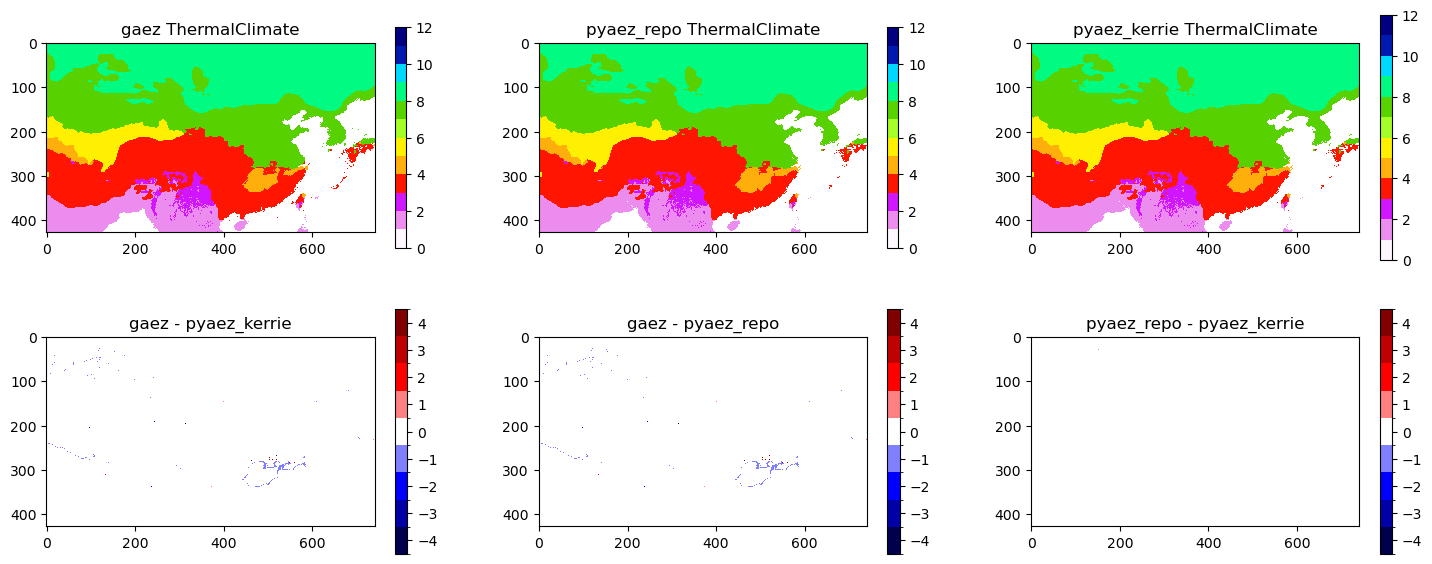

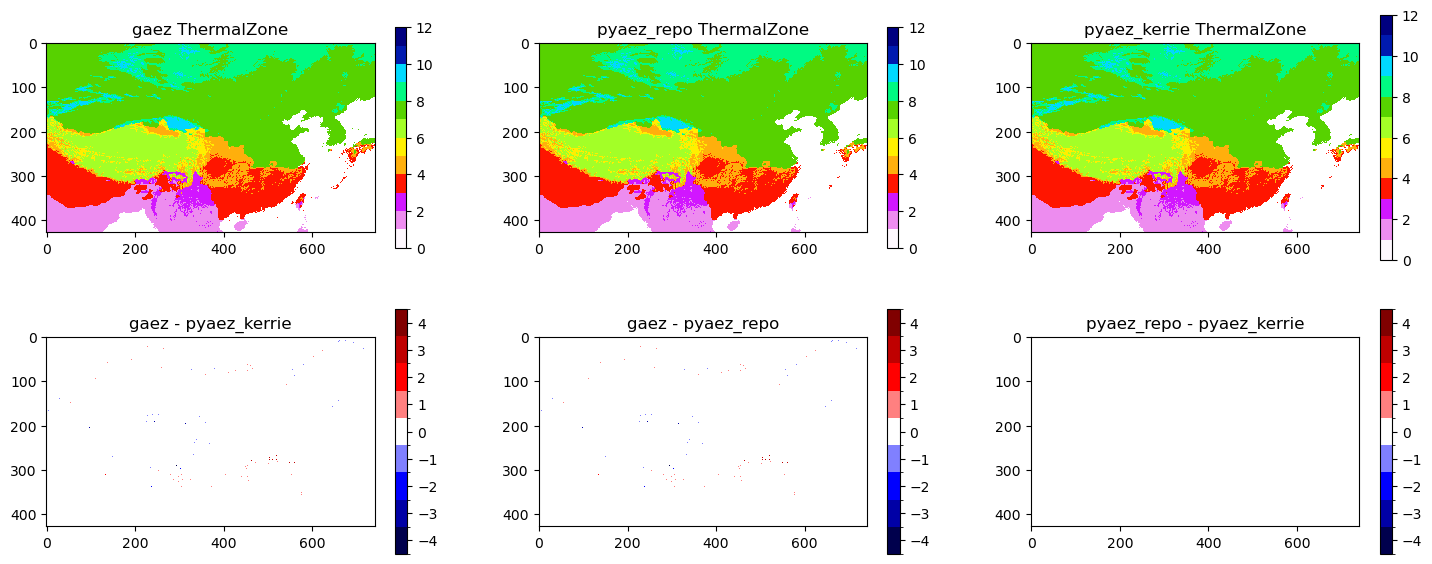

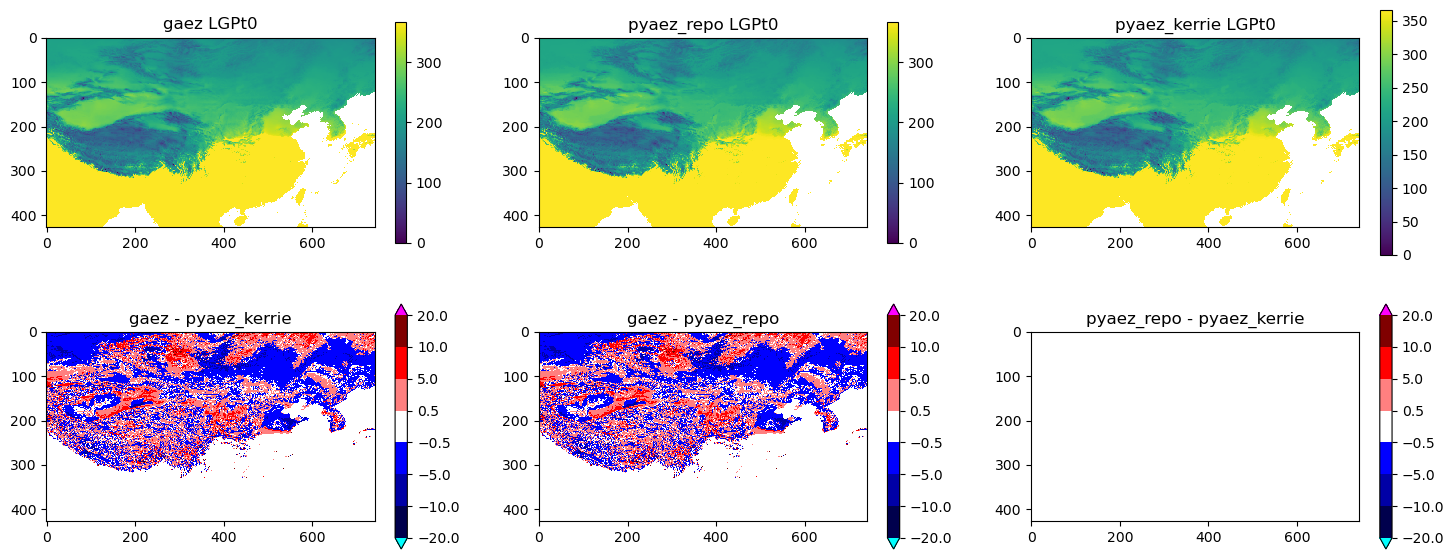

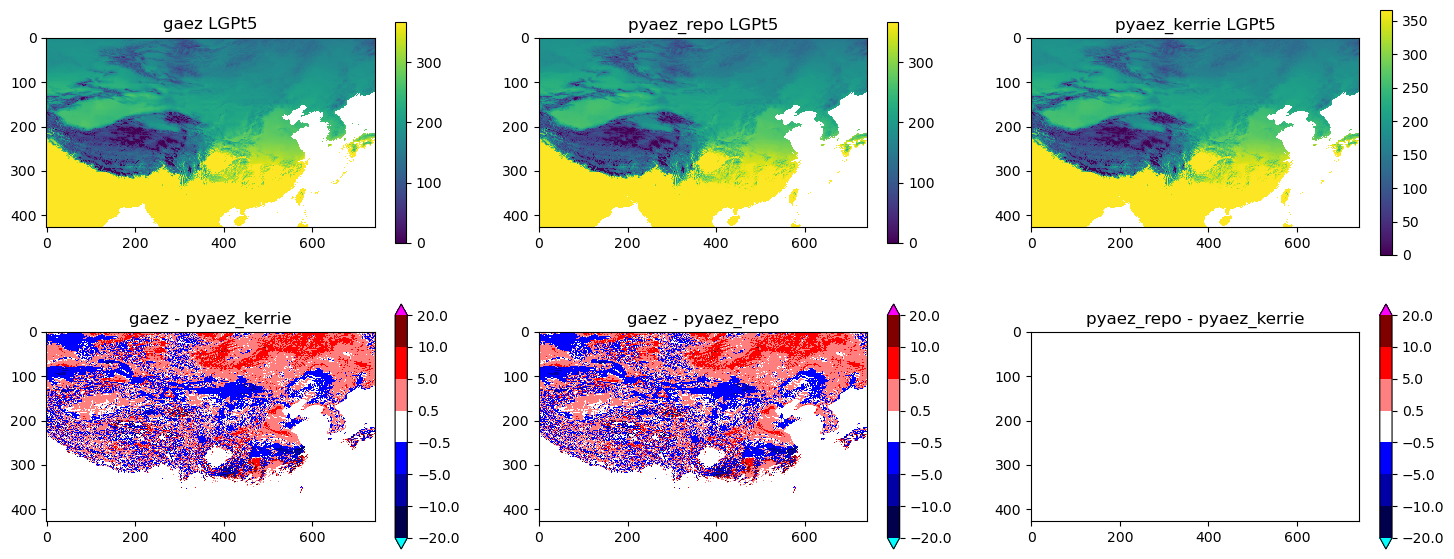

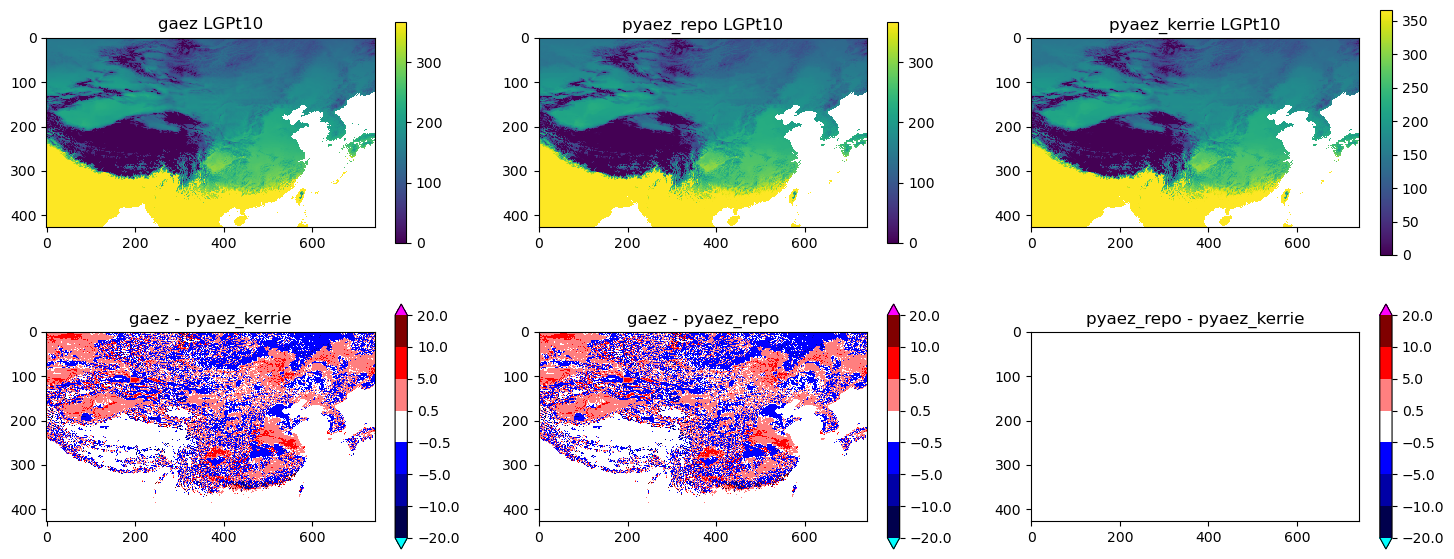

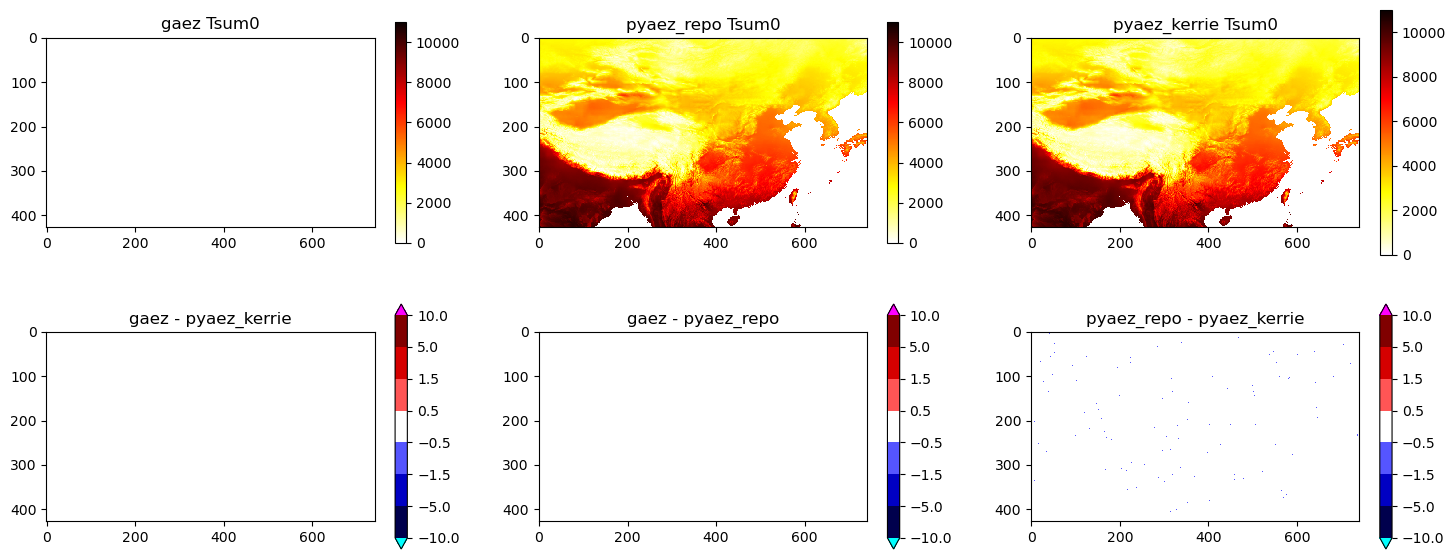

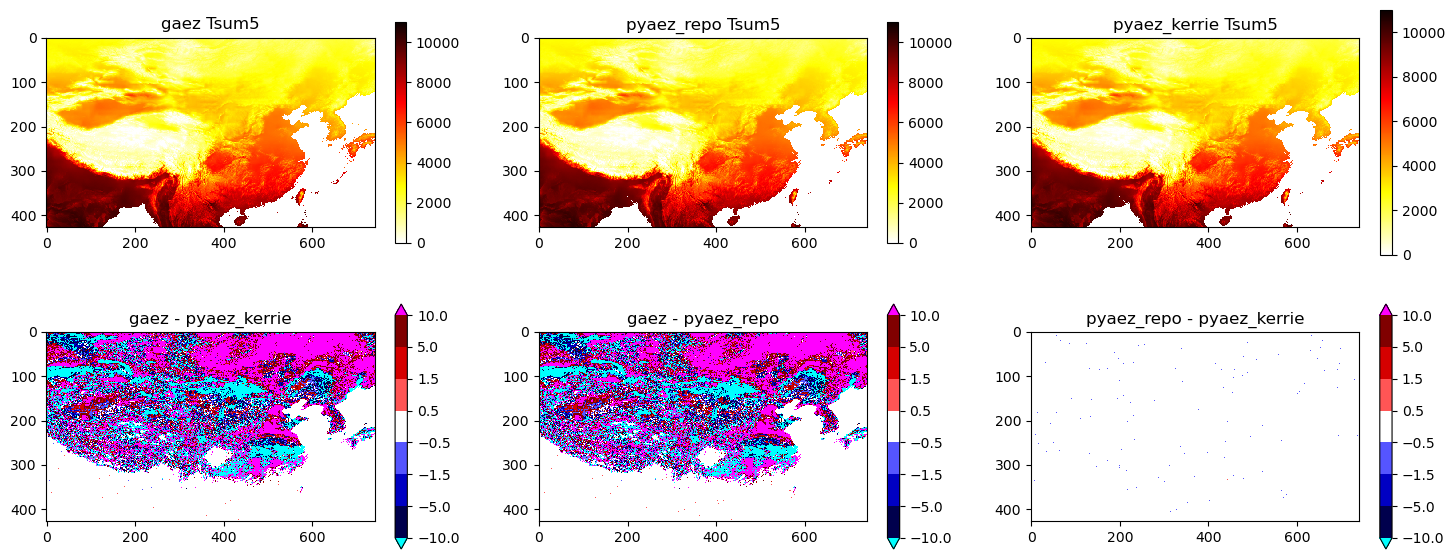

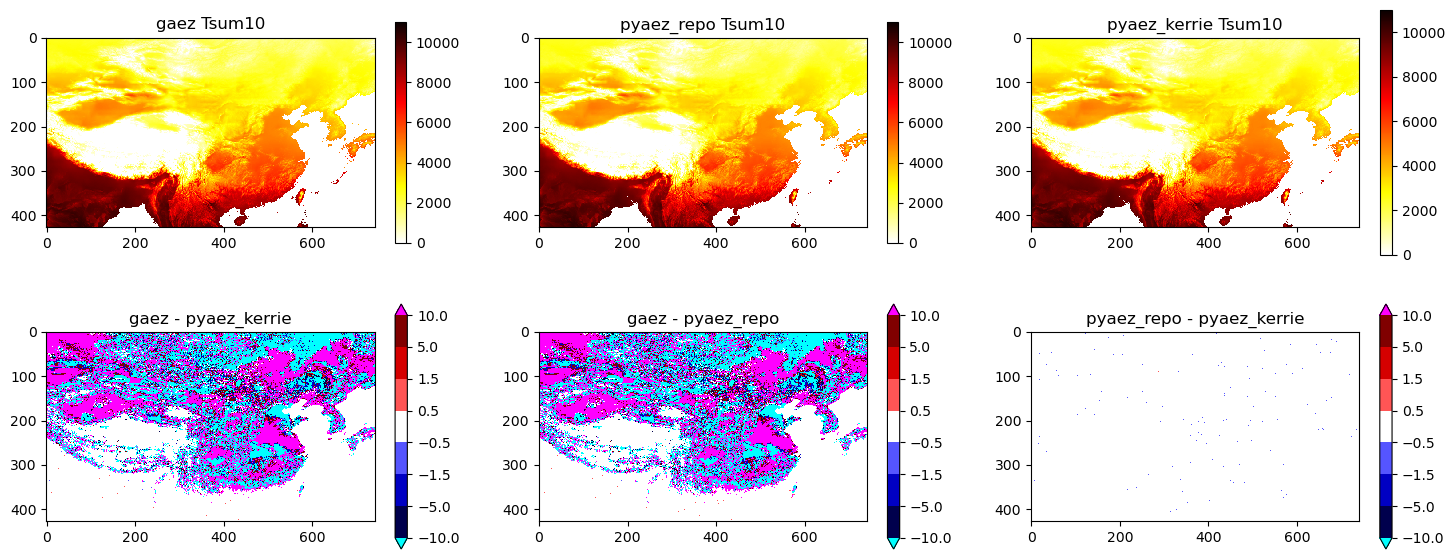

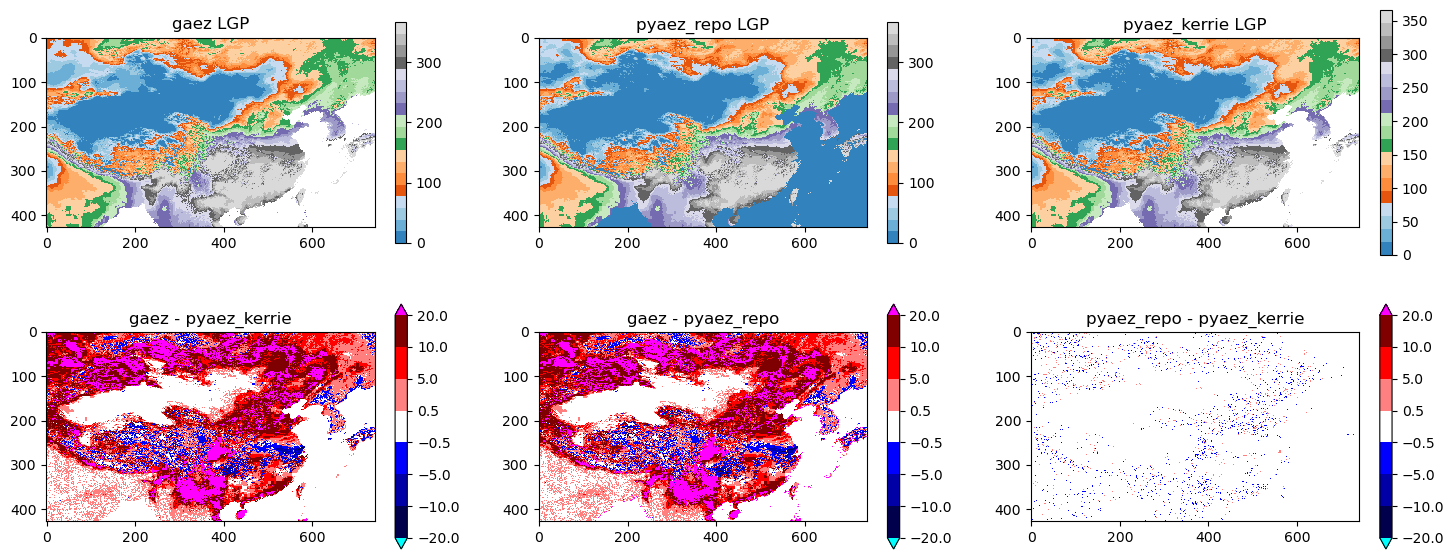

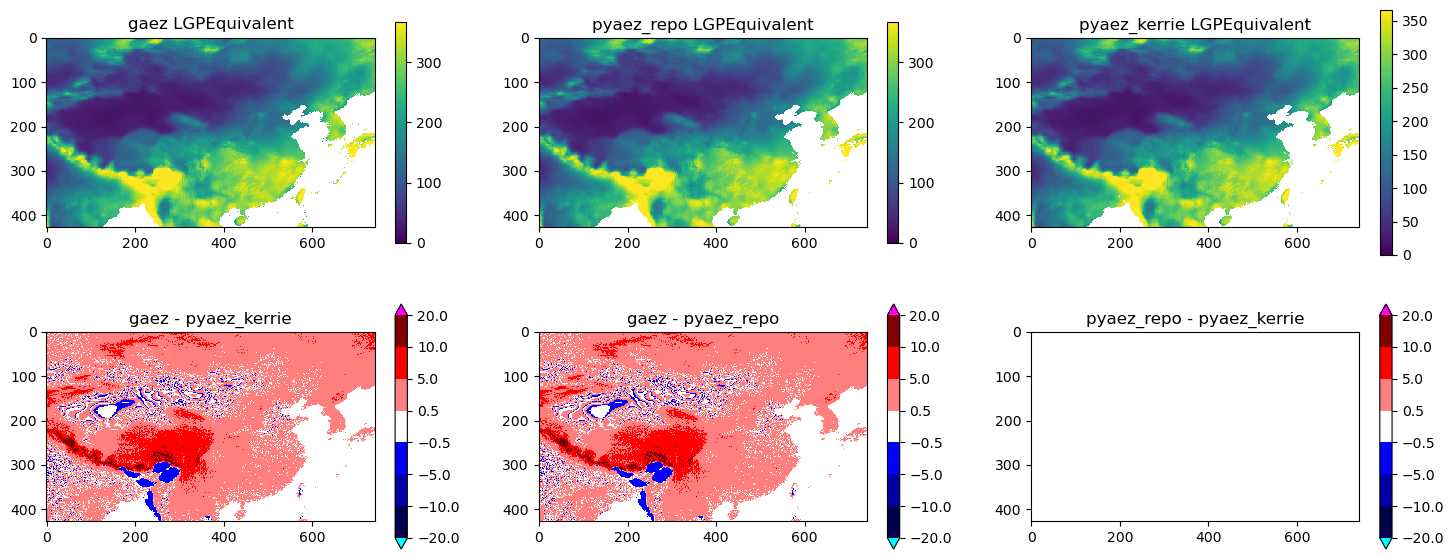

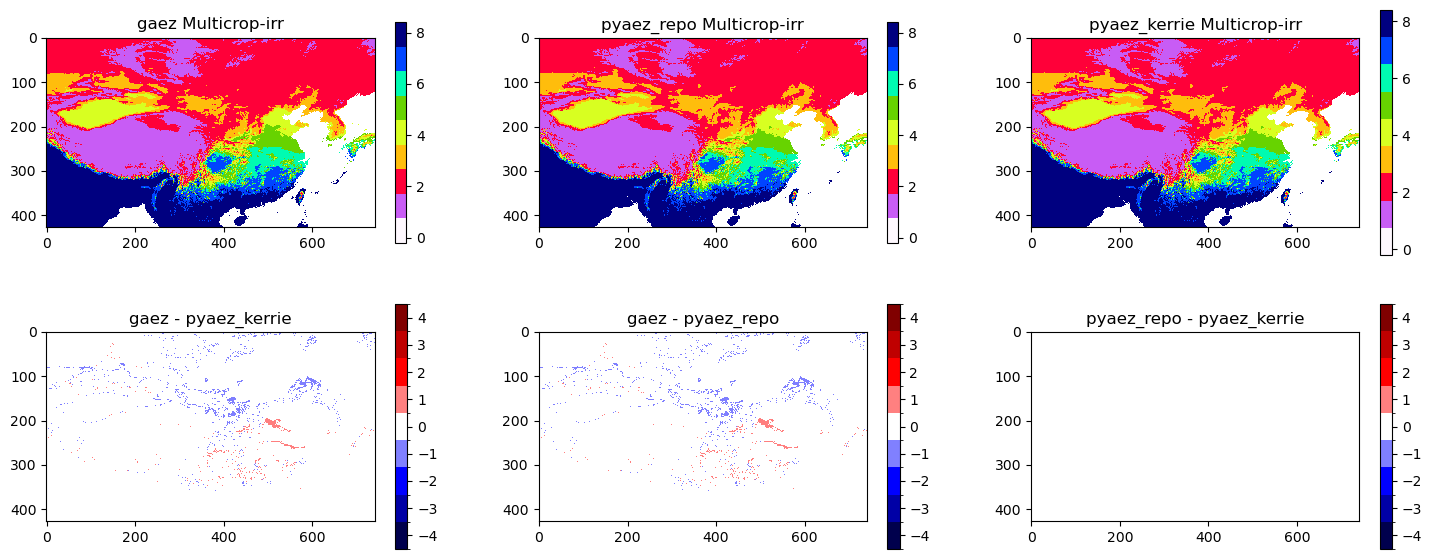

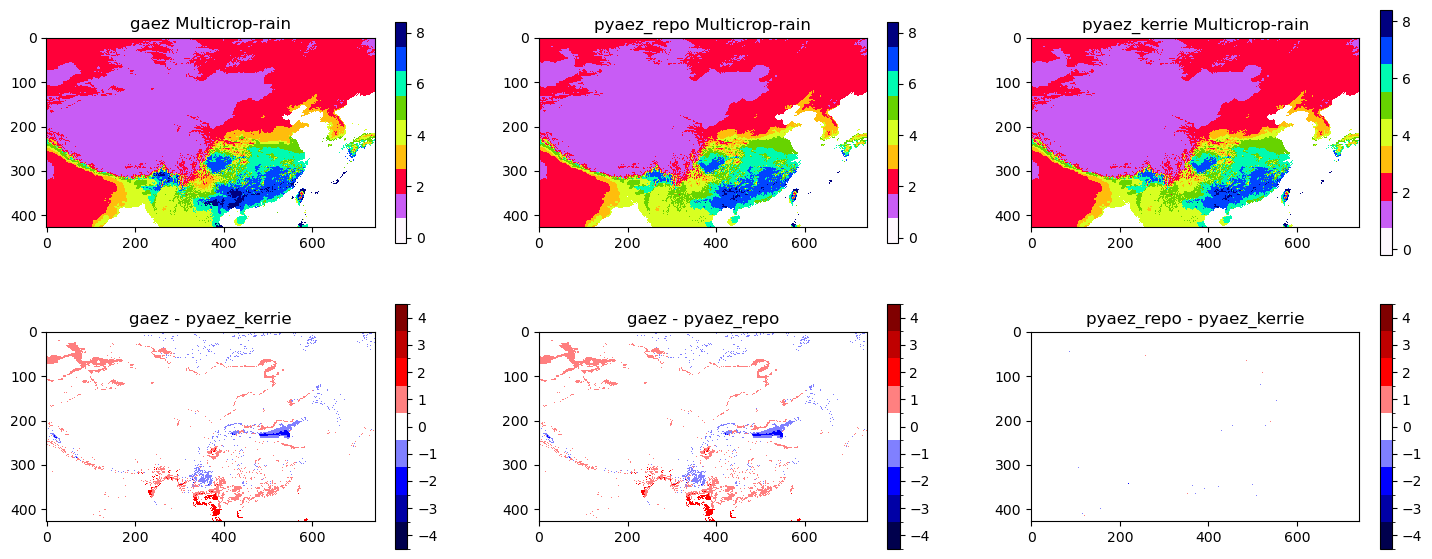

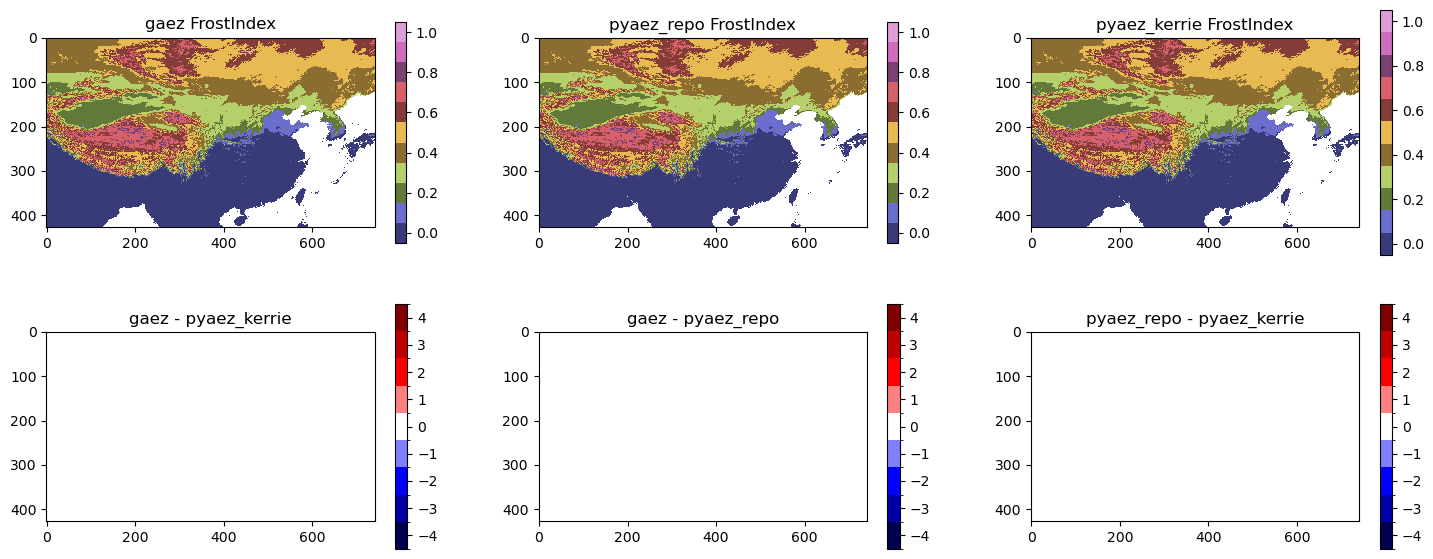

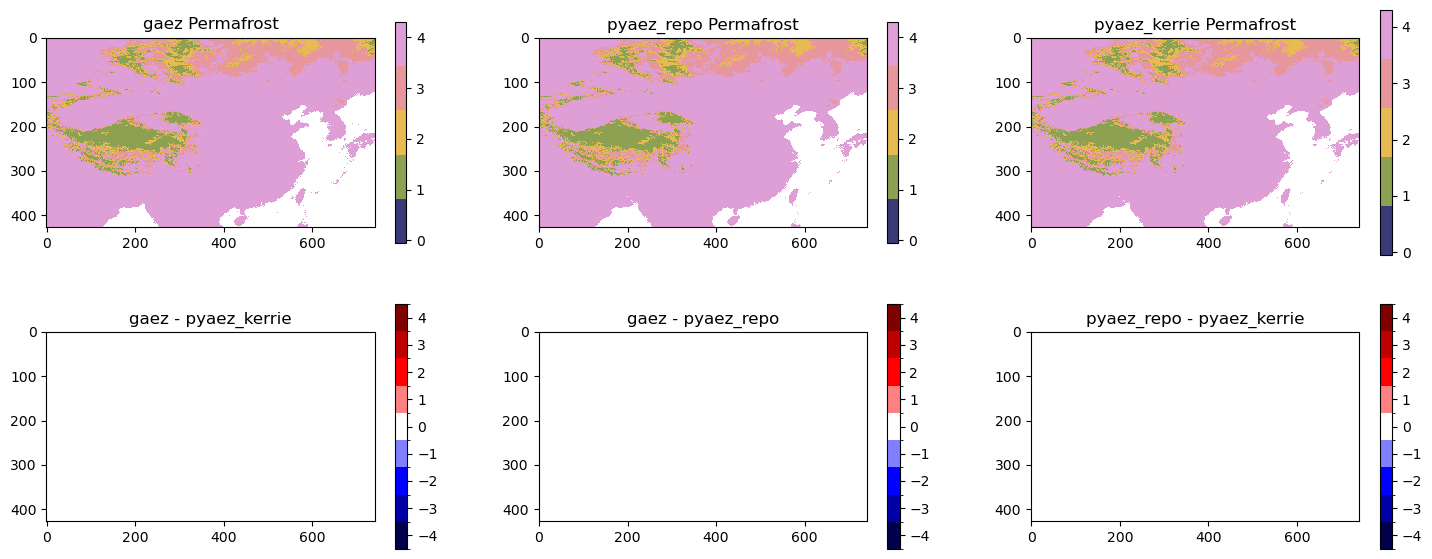

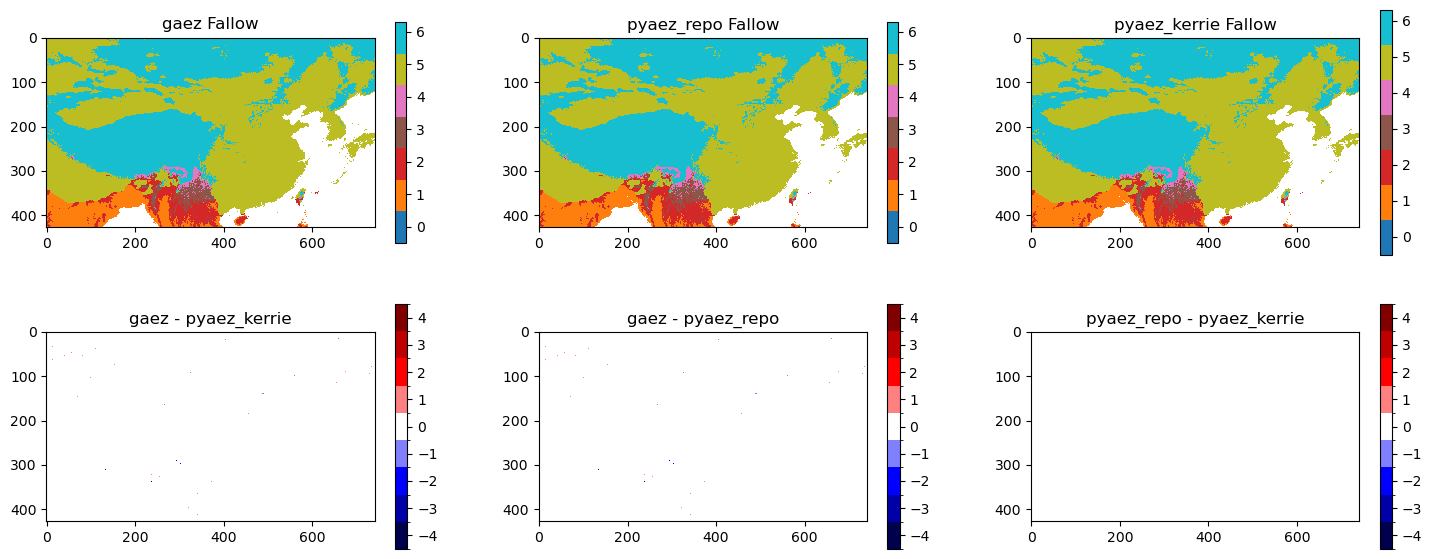

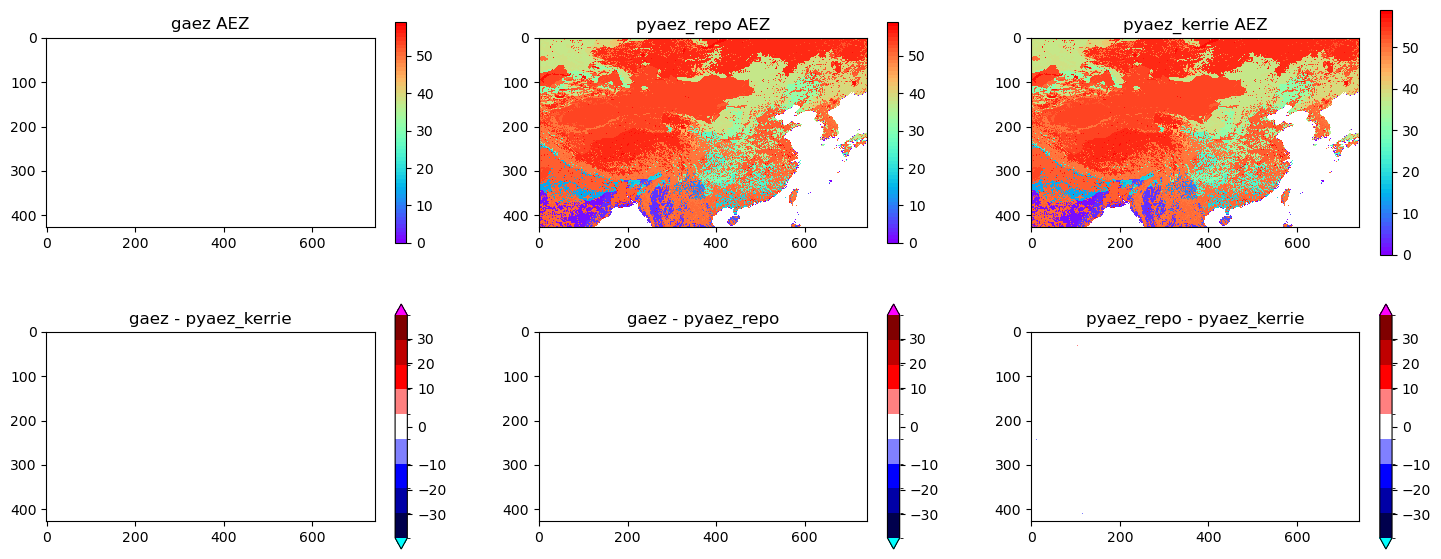

In [3]:
for v in varnames[0:16]:
    # get 3 files: gaez, pyaez repo version, kerrie's parvec version
    try:
        gf=glob.glob(gaezdir+varinfo[v]['gaez']+'_*.rst')[0]
    except:
        gf=''
    pf=glob.glob(pyaezdir+varinfo[v]['pyaez']+'_'+domain+'_'+revpy+'.tif')[0]
    pfkg=glob.glob(parvecdir+varinfo[v]['parvec']+'_'+domain+'_'+revpykg+'.tif')[0]
    # if (v != 'LGP'):
    #     pfkg=glob.glob(parvecdir+varinfo[v]['parvec']+'_'+domain+'_'+revpykg+'.tif')[0]
    # else:
    #     pfkg=glob.glob(parvecdir+'LGPnp_'+domain+'_'+revpykg+'.tif')[0]

    # load all three files    
    p_ds=xr.open_dataset(pf,engine='rasterio').squeeze()
    kg_ds=xr.open_dataset(pfkg,engine='rasterio').squeeze()
    try:
        g_ds=xr.open_dataset(gf,engine='rasterio').squeeze()
    except:
        g_ds=p_ds.copy(deep=True)
        g_ds['band_data'][:]=np.nan


    if v in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[v]['cmap'], varinfo[v]['levels'])
    else:
        cmap=varinfo[v]['cmap']

    if v == 'LGP':
        cmap=plt.get_cmap('tab20c',19).copy()
        cmap.set_extremes(over='magenta',under='cyan')
        bounds=[0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]#[0,30,60,90,120,150,180,210,240,270,300,330,360] 
        ticks=[0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]#[0,30,60,90,120,150,180,210,240,270,300,330,360]
        extend='max'

    # plot gaez results
    plt.figure(figsize=(18,7))
    plt.subplot(2, 3, 1)
    plt.imshow(g_ds.band_data, 
                cmap=cmap,
                vmin=varinfo[v]['vmin'],
                vmax=varinfo[v]['vmax'],
                interpolation='none')
    plt.title('gaez '+v)
    plt.colorbar(shrink=0.9)


    # plot pyaez repo results
    plt.subplot(2, 3, 2)
    plt.imshow(p_ds.band_data, 
                cmap=cmap,
                vmin=varinfo[v]['vmin'],
                vmax=varinfo[v]['vmax'],
                interpolation='none')
    plt.title('pyaez_repo '+v)
    plt.colorbar(shrink=0.9)

    # plot pyaez kerrie results
    plt.subplot(2, 3, 3)
    plt.imshow(kg_ds.band_data, 
                cmap=cmap,
                vmin=varinfo[v]['vmin'],
                vmax=varinfo[v]['vmax'],
                interpolation='none')
    plt.title('pyaez_kerrie '+v)
    plt.colorbar()

    # info for difference maps
    if v in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow']:
        cmap=plt.get_cmap('seismic',9).copy()
        bounds=[-4.5,-3.5,-2.5,-1.5,-0.5,.5,1.5,2.5,3.5,4.5]
        ticks=[-4,-3,-2,-1,0,1,2,3,4]    
        extend='neither'    
    elif v in ['LGPt0','LGPt5','LGPt10','LGP','LGPEquivalent']:
        cmap=plt.get_cmap('seismic',9).copy()
        cmap.set_extremes(over='magenta',under='cyan')
        bounds=[-20,-10,-5,-.5,.5,5,10,20]
        ticks=[-20,-10,-5,-.5,.5,5,10,20]
        extend='both'
    elif v in ['Tsum0','Tsum5','Tsum10']:
        cmap=plt.get_cmap('seismic',7).copy()
        cmap.set_extremes(over='magenta',under='cyan')
        bounds=[-10,-5,-1.5,-.5,.5,1.5,5,10]
        ticks=[-10,-5,-1.5,-.5,.5,1.5,5,10]
        extend='both'    
    elif v in ['AEZ']:
        cmap=plt.get_cmap('seismic',9).copy()
        cmap.set_extremes(over='magenta',under='cyan')
        bounds=[-39.5,-29.5,-19.5,-9.5,-0.5,0.5,9.5,19.5,29.5,39.5]
        ticks=[-40,-30,-20,-10,0,10,20,30,40]
        extend='both'          
    norm=colors.BoundaryNorm(bounds,cmap.N)
    
    # gaez - kerrie results
    plt.subplot(2, 3, 4)
    plt.imshow(g_ds.band_data.data-kg_ds.band_data.data,
    cmap=cmap,
    norm=norm,
    interpolation='none')
    plt.title('gaez - pyaez_kerrie')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend)

    # gaez - pyaez_repo results
    plt.subplot(2, 3, 5)
    plt.imshow(g_ds.band_data.data-p_ds.band_data.data, 
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('gaez - pyaez_repo')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend)

    # pyaez_repo - kerrie results
    plt.subplot(2, 3, 6)
    plt.imshow(p_ds.band_data.data-kg_ds.band_data.data, 
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('pyaez_repo - pyaez_kerrie')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend)
    plt.show()

    # del gf,pf,pfkg,g_ds,p_ds,kg_ds
    

In [ ]:
pf=glob.glob(pyaezdir+'ETAday0_'+domain+'_'+revpy+'.tif')[0]
pfkg=glob.glob(parvecdir+'ETAday0_'+domain+'_'+revpykg+'.tif')[0]

# load all three files    
p_ds=xr.open_dataset(pf,engine='rasterio').squeeze()
kg_ds=xr.open_dataset(pfkg,engine='rasterio').squeeze()

plt.figure(figsize=(18,4))
    # plot pyaez repo results
plt.subplot(1, 3, 1)
plt.imshow(p_ds.band_data, 
            interpolation='none')
plt.title('pyaez_repo ETA')
plt.colorbar()

# plot pyaez kerrie results
plt.subplot(1, 3, 2)
plt.imshow(kg_ds.band_data, 
            interpolation='none')
plt.title('pyaez_kerrie ETA')
plt.colorbar()

# plot pyaez kerrie results
plt.subplot(1, 3, 3)
plt.imshow(p_ds.band_data.data-kg_ds.band_data.data,
            cmap='bwr',
            vmin=-5,
            vmax=5,
            interpolation='none')
plt.title('repo - kerrie ETA')
plt.colorbar()


In [ ]:
pf=glob.glob(pyaezdir+'ETMday0_'+domain+'_'+revpy+'.tif')[0]
pfkg=glob.glob(parvecdir+'ETMday0_'+domain+'_'+revpykg+'.tif')[0]

# load all three files    
p_ds=xr.open_dataset(pf,engine='rasterio').squeeze()
kg_ds=xr.open_dataset(pfkg,engine='rasterio').squeeze()

plt.figure(figsize=(18,4))
    # plot pyaez repo results
plt.subplot(1, 3, 1)
plt.imshow(p_ds.band_data, 
            interpolation='none')
plt.title('pyaez_repo ETM')
plt.colorbar()

# plot pyaez kerrie results
plt.subplot(1, 3, 2)
plt.imshow(kg_ds.band_data, 
            interpolation='none')
plt.title('pyaez_kerrie ETM')
plt.colorbar()

# plot pyaez kerrie results
plt.subplot(1, 3, 3)
plt.imshow(p_ds.band_data.data-kg_ds.band_data.data,
            cmap='bwr',
            vmin=-5,
            vmax=5,
            interpolation='none')
plt.title('repo - kerrie ETM')
plt.colorbar()

In [ ]:
pf=glob.glob(pyaezdir+'WBday0_'+domain+'_'+revpy+'.tif')[0]
pfkg=glob.glob(parvecdir+'WBday0_'+domain+'_'+revpykg+'.tif')[0]

# load all three files    
p_ds=xr.open_dataset(pf,engine='rasterio').squeeze()
kg_ds=xr.open_dataset(pfkg,engine='rasterio').squeeze()

plt.figure(figsize=(18,4))
    # plot pyaez repo results
plt.subplot(1, 3, 1)
plt.imshow(p_ds.band_data, 
            vmin=0,
            vmax=100,
            interpolation='none')
plt.title('pyaez_repo WB')
plt.colorbar()

# plot pyaez kerrie results
plt.subplot(1, 3, 2)
plt.imshow(kg_ds.band_data, 
            vmin=0,
            vmax=100,
            interpolation='none')
plt.title('pyaez_kerrie WB')
plt.colorbar()

# plot pyaez kerrie results
plt.subplot(1, 3, 3)
plt.imshow(p_ds.band_data.data-kg_ds.band_data.data,
            cmap='bwr',
            vmin=-50,
            vmax=50,
            interpolation='none')
plt.title('repo - kerrie WB')
plt.colorbar(extend='both')

In [ ]:
pf=glob.glob(pyaezdir+'SBday0_'+domain+'_'+revpy+'.tif')[0]
pfkg=glob.glob(parvecdir+'SBday0_'+domain+'_'+revpykg+'.tif')[0]

# load all three files    
p_ds=xr.open_dataset(pf,engine='rasterio').squeeze()
kg_ds=xr.open_dataset(pfkg,engine='rasterio').squeeze()

plt.figure(figsize=(18,4))
    # plot pyaez repo results
plt.subplot(1, 3, 1)
plt.imshow(p_ds.band_data, 
            vmin=0,
            vmax=50,
            interpolation='none')
plt.title('pyaez_repo SB')
plt.colorbar(extend='max')

# plot pyaez kerrie results
plt.subplot(1, 3, 2)
plt.imshow(kg_ds.band_data, 
            vmin=0,
            vmax=50,
            interpolation='none')
plt.title('pyaez_kerrie SB')
plt.colorbar(extend='max')

# plot pyaez kerrie results
plt.subplot(1, 3, 3)
plt.imshow(p_ds.band_data.data-kg_ds.band_data.data,
            cmap='bwr',
            vmin=-50,
            vmax=50,
            interpolation='none')
plt.title('repo - kerrie SB')
plt.colorbar(extend='both')

In [ ]:
p_ds.band_data.min(),kg_ds.band_data.min()


In [ ]:
p_ds.band_data.max(),kg_ds.band_data.max()


In [ ]:
test=p_ds.copy()
test['band_data'][:]=np.nan
np.unique(test.band_data)

In [ ]:
np.unique(kg_ds.band_data.data-p_ds.band_data.data)

In [ ]:
diff=p_ds.band_data.data - kg_ds.band_data.data
diff

In [ ]:
import numpy as np
np.unique(diff)

In [ ]:
p_ds.band_data.data

In [ ]:
kg_ds.band_data.data

In [ ]:
#ThermalClimate
f=glob.glob(gaezdir+r'mcl_*.rst')[0]
ds=xr.open_dataset(f,engine='rasterio').squeeze()

fig = plt.figure()
# plt.imshow(ds.band_data, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5,interpolation='none')
plt.imshow(ds.band_data, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=0,vmax=12,interpolation='none')
plt.title('ThermalClimate')
plt.colorbar()
plt.show()

In [ ]:
#ThermalZone
f=glob.glob(gaezdir+r'mc2_*.rst')[0]
ds=xr.open_dataset(f,engine='rasterio').squeeze()

fig = plt.figure()
plt.imshow(ds.band_data, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=0,vmax=12,interpolation='none')
plt.title('ThermalZone')
plt.colorbar()
plt.show()

In [ ]:
#LGPt0
f=glob.glob(gaezdir+r'lt1_*.rst')[0]
lgpt0=xr.open_dataset(f,engine='rasterio').squeeze().band_data

f=glob.glob(gaezdir+r'lt2_*.rst')[0]
lgpt5=xr.open_dataset(f,engine='rasterio').squeeze().band_data

f=glob.glob(gaezdir+r'lt3_*.rst')[0]
lgpt10=xr.open_dataset(f,engine='rasterio').squeeze().band_data

'''save and visualize result'''
#======================
plt.figure(1, figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.imshow(lgpt0,vmin=0,vmax=366)
plt.title('LGPt 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(lgpt5, vmin=0, vmax=366)
plt.title('LGPt 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(lgpt10, vmin=0, vmax=366)
plt.title('LGPt 10')
plt.colorbar(shrink=0.8)
#----------------------
plt.show()
#======================

In [ ]:
#Tsum
f=glob.glob(gaezdir+r'ts2_*.rst')[0]
tsum0=xr.open_dataset(f,engine='rasterio').squeeze().band_data

f=glob.glob(gaezdir+r'ts2_*.rst')[0]
tsum5=xr.open_dataset(f,engine='rasterio').squeeze().band_data

f=glob.glob(gaezdir+r'ts3_*.rst')[0]
tsum10=xr.open_dataset(f,engine='rasterio').squeeze().band_data

plt.figure(1, figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.imshow(tsum0, cmap='hot_r', vmin=0, vmax=11000)
plt.title('T-sumation 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(tsum5, cmap='hot_r', vmin=0, vmax=11000)
plt.title('T-sumation 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(tsum10, cmap='hot_r', vmin=0, vmax=11000)
plt.title('T-sumation 10')
plt.colorbar(shrink=0.8)
#----------------------
# plt.savefig("./data_output/NB1/LAO_Tsum.png",
#             bbox_inches="tight", dpi=300)
plt.show()

In [ ]:
#LGP
f=glob.glob(gaezdir+r'lgd_*.rst')[0]
lgp=xr.open_dataset(f,engine='rasterio').squeeze().band_data

f=glob.glob(gaezdir+r'eq1_*.rst')[0]
lgpeq=xr.open_dataset(f,engine='rasterio').squeeze().band_data


fig = plt.figure(figsize=(12,3))
# plt.subplot(121)
plt.imshow(lgp, cmap='viridis', vmin=0, vmax=366,interpolation='none')
plt.title('LGP [days]')
plt.colorbar()
# plt.subplot(122)
fig = plt.figure(figsize=(12,3))
plt.imshow(lgpeq, cmap='viridis', vmin=0, vmax=366,interpolation='none')
plt.title('LGP Equivalent [days]')
plt.colorbar()

plt.show()

In [ ]:
#mult-crop
f=glob.glob(gaezdir+r'mcr_*.rst')[0]
multi_crop_rainfed=xr.open_dataset(f,engine='rasterio').squeeze().band_data

f=glob.glob(gaezdir+r'mci_*.rst')[0]
multi_crop_irr=xr.open_dataset(f,engine='rasterio').squeeze().band_data

fig = plt.figure()
plt.imshow(multi_crop_irr, cmap=plt.get_cmap('gist_ncar_r', 9), vmin=-0.2, vmax=8.4,interpolation='none')
plt.title('Multi Cropping Zone - IRR')
plt.colorbar()
plt.savefig(out_path+"Multicrop-irr_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

fig = plt.figure()
plt.imshow(multi_crop_rainfed,cmap=plt.get_cmap('gist_ncar_r', 9), vmin=-0.2, vmax=8.4,interpolation='none')
plt.title('Multi Cropping Zone - RAINFED')
plt.colorbar()
plt.savefig(out_path+"Multicrop-rain_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

In [ ]:
# frost
f=glob.glob(gaezdir+r'fst_*.rst')[0]
frost_index=xr.open_dataset(f,engine='rasterio').squeeze().band_data

f=glob.glob(gaezdir+r'pfr_*.rst')[0]
permafrost=xr.open_dataset(f,engine='rasterio').squeeze().band_data


fig = plt.figure()
plt.imshow(frost_index, cmap=plt.get_cmap('tab20b', 11), vmin=-0.05, vmax=1.05,interpolation='none')
plt.title('Frost Index')
plt.colorbar()
plt.savefig(out_path+"FrostIndex_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

fig = plt.figure()
plt.imshow(permafrost, cmap=plt.get_cmap('tab20b', 5), vmin=-0.5, vmax=4.3,interpolation='none')
plt.title('Permafrost Evaluation')
plt.colorbar()
plt.savefig(out_path+"Permafrost_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

In [ ]:
# fallow
f=glob.glob(gaezdir+r'tfr_*.rst')[0]
tzone_fallow=xr.open_dataset(f,engine='rasterio').squeeze().band_data

fig = plt.figure()
plt.imshow(tzone_fallow, cmap=plt.get_cmap('tab10', 7), vmin=-0.5, vmax=6.3,interpolation='none')
plt.title('Fallow Requirement')
plt.colorbar()

In [ ]:
gfiles=glob.glob(gaezdir+r'*_CRUTS32_Hist_8110.rst')
gfiles

In [ ]:
ds=xr.open_dataset(gfiles[3],engine='rasterio').squeeze()
ds

In [ ]:
# ds.band_data.plot()
# varname=gfiles[0].split('\\')[1].split('_')[0]
# plt.title(varname)

fig = plt.figure()
plt.imshow(ds.band_data, cmap=plt.get_cmap('tab20b', 11), vmin=-0.05, vmax=1.05,interpolation='none')
plt.title('Frost Index')
plt.colorbar()
plt.show()

In [ ]:
f=glob.glob(gaezdir+r'mci_*.rst')[0]
ds=xr.open_dataset(f,engine='rasterio').squeeze()

fig = plt.figure()
plt.imshow(ds.band_data, cmap=plt.get_cmap('gist_ncar_r', 9), vmin=-0.2, vmax=8.4,interpolation='none')
plt.title('Multi Cropping Zone - IRR')
plt.colorbar()
plt.savefig(out_path+"Multicrop-irr_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

In [ ]:
for f in gfiles:
    ds=xr.open_dataset(f,engine='rasterio').squeeze()
    varname=f.split('\\')[1].split('_')[0]
    ds.band_data.plot()
    plt.title(varname)
    plt.show()

In [ ]:
# expect <1s run time

# DATA INFORMATION
daily = True          # Type of climate data. True: daily, False: monthly (NOTE: parallel processing not yet implemented for Daily=False, notebook may fail)
parallel=True #False# # flag for dask parallel processing (for speed). True: use dask. False: no dask, only numpy
mask_value = 0        # pixel value in admin_mask to exclude from the analysis

if parallel:
    import dask.array as da
    import dask

start=timer()

# If parallel=True, load the inputs as lazy dask arrays, data type float32 
max_temp = da.from_npy_stack(data_dir+'Tmax-2m365/').astype('float32')  # maximum temperature
min_temp = da.from_npy_stack(data_dir+'Tmin-2m365/').astype('float32')  # minimum temperature
precipitation = da.from_npy_stack(data_dir+'Precip365/').astype('float32')  # precipitation
rel_humidity = da.from_npy_stack(data_dir+'Rhum365/').astype('float32')  # relative humidity
wind_speed = da.from_npy_stack(data_dir+'Wind-2m365/').astype('float32') # wind speed measured at two meters
short_rad = da.from_npy_stack(data_dir+'Srad365/').astype('float32')  # shortwave radiation
mask=da.from_array(gdal.Open(maskfile).ReadAsArray())
elevation=da.from_array(gdal.Open(elevfile).ReadAsArray())
soil_terrain_lulc=da.from_array(gdal.Open(soilfile).ReadAsArray())

# # If parallel=False, comment out the above and instead load the inputs as numpy arrays, data type float32 
# max_temp = np.load(data_dir+'Tmax-2m365/0.npy').astype('float32')  # maximum temperature
# min_temp = np.load(data_dir+'Tmin-2m365/0.npy').astype('float32')  # minimum temperature
# precipitation = np.load(data_dir+'Precip365/0.npy').astype('float32')  # precipitation
# rel_humidity = np.load(data_dir+'Rhum365/0.npy').astype('float32')  # relative humidity
# wind_speed = np.load(data_dir+'Wind-2m365/0.npy').astype('float32') # wind speed measured at two meters
# short_rad = np.load(data_dir+'Srad365/0.npy').astype('float32')  # shortwave radiation
# mask=gdal.Open(maskfile).ReadAsArray()
# elevation=gdal.Open(elevfile).ReadAsArray()
# soil_terrain_lulc=gdal.Open(soilfile).ReadAsArray()

# print(min_temp.shape,mask.shape,soil_terrain_lulc.shape)
# print(round((max_temp.nbytes+min_temp.nbytes+precipitation.nbytes+rel_humidity.nbytes+wind_speed.nbytes+short_rad.nbytes+mask.nbytes+elevation.nbytes+soil_terrain_lulc.nbytes)/1E9,2),'GB total input data')

task_time=timer()-start
task_time

In [ ]:
# Define the Area-Of-Interest's geographical extents

# if lat_min/lat_max values defined below are located at pixel center --> set lat_centers to True 
# if they are located at the exterior pixel edge --> set lat_centers to False
lat_centers=True 

# provide min and max latitudes (either set manually or read from a data file)
# lat_min = 18.04167
# lat_max = 53.625
# I'm limiting precision here to avoid any misalignment of the grid cells
lats=rio.open_rasterio(maskfile)['y'].data   # get array of latitudes from maskfile
lat_min = np.trunc(lats.min()*100000)/100000 # min lat value at pixel center, limit precision to 5 decimal places
lat_max = np.trunc(lats.max()*100000)/100000 # max lat value at pixel center, limit precision 5 decimal places

### Loading the imported data into the Object Class ('*clim_reg*' Class)

In [ ]:
# expect <1s run time

# For parallel=True, this sets the chunk size based on the amount of available RAM and CPU threads
# There are 2 possible user overrides: 
# 1) instead of accepting the default chunk size, the user can enter the total number of 
# chunks desired in order to increase or decrease the chunk size. However, choosing very 
# large chunks may cause the notebook to fail due to lack of available memory.
# 2) The user can indicate they want to use less RAM for the computation with reduce_mem_used=True, 
# which sets a smaller chunk size that allows the computations to proceed using less than xGB RAM

# For parallel=False, this sets all parameters associated with chunking to None

start=timer()

clim_reg.setParallel(max_temp,parallel)#,nchunks=288,reduce_mem_used=True)

task_time=timer()-start
print(clim_reg.__dict__.keys())
print(clim_reg.nchunks, clim_reg.chunk3D, clim_reg.chunksize3D_MB)
print('time:',task_time)

In [ ]:
# expect <1s run time

# For parallel=True, this chunks clim_reg.im_mask

start=timer()

clim_reg.setStudyAreaMask(mask, mask_value)

task_time=timer()-start
print(clim_reg.__dict__.keys())
print('time:',task_time)

In [ ]:
# expect <1s run time

# Added functionality includes identifying whether the lat_min lat_max given
# are located at pixel centers or exterior edges. The function now takes this 
# into account when generating a 2D latitude map.

# For parallel=True, this chunks clim_reg.latitude and clim_reg.elevation

start=timer()

clim_reg.setLocationTerrainData(lat_min, lat_max, lat_centers, elevation) #KLG

task_time=timer()-start
print(clim_reg.__dict__.keys())
print('time:',task_time)


In [ ]:
# parallel=True; for global expect ~8-12min run time
# parallel=True; for china expect 10-25s run time
# parallel=False; for china expect x

# For parallel=True, this chunks all input variables and attaches to clim_reg as lazy dask arrays which aren't held in RAM
# It computes the following as numpy arrays saved in RAM: pet_daily, meanT_monthly_sealevel, P_by_PET_monthly, 
# meanT_monthly, totalPrec_monthly, annual_Tmean, annual_accPrec, annual_accPET
# Everything else remains a dask array to be loaded and computed later when needed.

start=timer()

clim_reg.setDailyClimateData(min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)

task_time=timer()-start
print(clim_reg.__dict__.keys())
print('time:',task_time)

In [ ]:
# parallel=True; for global expect <5s run time
# parallel=True; for china expect <1s run time

start=timer()

tclimate = clim_reg.getThermalClimate()

task_time=timer()-start
print('time:',task_time)

fig = plt.figure()
plt.imshow(tclimate, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5,interpolation='none')
plt.title('Thermal Climate')
plt.colorbar(shrink=0.4)

plt.savefig(out_path+"ThermalClimate_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

obj_utilities.saveRaster(maskfile,out_path+"ThermalClimate_"+domain+"_"+revname+".tif",tclimate) #Save as GeoTIFF raster



In [ ]:
# parallel=True; for global expect <5s run time
# parallel=True; for china expect <1s run time

start=timer()

tzone = clim_reg.getThermalZone()

task_time=timer()-start
print('time:',task_time)

fig = plt.figure()
plt.imshow(tzone, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5,interpolation='none')
plt.title('Thermal Zones')
plt.colorbar(shrink=0.4)

plt.savefig(out_path+"ThermalZone_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

obj_utilities.saveRaster(maskfile,out_path+"ThermalZone_"+domain+"_"+revname+".tif",tzone) #Save as GeoTIFF raster


In [ ]:
# parallel=True; for global expect 70-105s run time
# parallel=True; for china expect <2s run time

start=timer()

lgpt0 = clim_reg.getThermalLGP0()
lgpt5 = clim_reg.getThermalLGP5()
lgpt10 = clim_reg.getThermalLGP10()

task_time=timer()-start
print('time:',task_time)

plt.figure(figsize=(12,3))
plt.subplot(1, 3, 1)
plt.imshow(lgpt0,vmin=0,vmax=366,interpolation='none')
plt.title('LGPt 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(lgpt5, vmin=0, vmax=366,interpolation='none')
plt.title('LGPt 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(lgpt10, vmin=0, vmax=366,interpolation='none')
plt.title('LGPt 10')
plt.colorbar(shrink=0.8)
#----------------------

plt.savefig(out_path+"ThermalLGPs_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

obj_utilities.saveRaster(maskfile,out_path+"LGPt0_"+domain+"_"+revname+".tif",lgpt0) #Save as GeoTIFF raster
obj_utilities.saveRaster(maskfile,out_path+"LGPt5_"+domain+"_"+revname+".tif",lgpt5) #Save as GeoTIFF raster
obj_utilities.saveRaster(maskfile,out_path+"LGPt10_"+domain+"_"+revname+".tif",lgpt10) #Save as GeoTIFF raster


In [ ]:
# parallel=True; for global expect 45-80s run time
# parallel=True; for china expect <2s run time

start=timer()

tsum0 = clim_reg.getTemperatureSum0()
tsum5 = clim_reg.getTemperatureSum5()
tsum10 = clim_reg.getTemperatureSum10()

task_time=timer()-start
print('time:',task_time)

plt.figure(figsize=(12,3))
plt.subplot(1, 3, 1)
plt.imshow(tsum0, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(tsum5, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(tsum10, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 10')
plt.colorbar(shrink=0.8)
#----------------------
plt.savefig(out_path+"Tsum_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

obj_utilities.saveRaster(maskfile,out_path+"Tsum0_"+domain+"_"+revname+".tif",tsum0) #Save as GeoTIFF raster
obj_utilities.saveRaster(maskfile,out_path+"Tsum5_"+domain+"_"+revname+".tif",tsum5) #Save as GeoTIFF raster
obj_utilities.saveRaster(maskfile,out_path+"Tsum10_"+domain+"_"+revname+".tif",tsum10) #Save as GeoTIFF raster


In [ ]:
# parallel=True; for global expect 12-25min run time
# parallel=True; for china expect 30-50s run time

start=timer()

lgp = clim_reg.getLGP(Sa=100., D=1.)
lgp_class = clim_reg.getLGPClassified(lgp)
lgp_equv = clim_reg.getLGPEquivalent()

task_time=timer()-start
print('time:',task_time)

fig = plt.figure(figsize=(12,3))
plt.subplot(121)
plt.imshow(lgp, cmap='viridis', vmin=0, vmax=366,interpolation='none')
plt.title('LGP [days]')
plt.colorbar(shrink=0.8)
plt.subplot(122)
plt.imshow(lgp_equv, cmap='viridis', vmin=0, vmax=366,interpolation='none')
plt.title('LGP Equivalent [days]')
plt.colorbar(shrink=0.8)

plt.savefig(out_path+"LGP-LGPEquiv_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

obj_utilities.saveRaster(maskfile,out_path+"LGP_"+domain+"_"+revname+".tif",lgp) #Save as GeoTIFF raster
obj_utilities.saveRaster(maskfile,out_path+"LGPEquivalent_"+domain+"_"+revname+".tif",lgp_equv) #Save as GeoTIFF raster




In [ ]:
# parallel=True; for global expect 2.5-4min run time
# parallel=True; for china expect 5-10s run time

start=timer()

tprofile = clim_reg.getTemperatureProfile()

task_time=timer()-start
print('time:',task_time)

tile_list = ['A1','A2','A3','A4','A5','A6','A7','A8','A9',
            'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']

fig = plt.figure(figsize=(8, 12))
for i1 in range(1, 19):
    plt.subplot(6, 3, i1)
    plt.imshow(tprofile[i1-1],interpolation='none',vmin=0,vmax=365,cmap='plasma')
    plt.title(tile_list[i1-1])
    plt.colorbar(shrink=0.8)
plt.tight_layout()

plt.savefig(out_path+"Tprofiles_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()


for label,profile in zip(tile_list,tprofile):
    obj_utilities.saveRaster(maskfile,out_path+"TProfile_"+label+"_"+domain+"_"+revname+".tif",profile) #Save as GeoTIFF raster


In [ ]:
# parallel=True; for global expect 15-25s run time
# parallel=True; for china expect <1s run time

start=timer()

multi_crop = clim_reg.getMultiCroppingZones(tclimate, lgp, lgpt5, lgpt10, tsum0, tsum10)
multi_crop_rainfed = multi_crop[0]  # for rainfed conditions
multi_crop_irr = multi_crop[1]  # for irrigated conditions

task_time=timer()-start
print('time:',task_time)

fig = plt.figure()
plt.imshow(multi_crop_irr, cmap=plt.get_cmap('gist_ncar_r', 9), vmin=-0.2, vmax=8.4,interpolation='none')
plt.title('Multi Cropping Zone - IRR')
plt.colorbar()
plt.savefig(out_path+"Multicrop-irr_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

fig = plt.figure()
plt.imshow(multi_crop_rainfed,cmap=plt.get_cmap('gist_ncar_r', 9), vmin=-0.2, vmax=8.4,interpolation='none')
plt.title('Multi Cropping Zone - RAINFED')
plt.colorbar()
plt.savefig(out_path+"Multicrop-rain_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()


obj_utilities.saveRaster(maskfile,out_path+"Multicrop-irr_"+domain+"_"+revname+".tif",multi_crop_irr) #Save as GeoTIFF raster
obj_utilities.saveRaster(maskfile,out_path+"Multicrop-rain_"+domain+"_"+revname+".tif",multi_crop_rainfed) #Save as GeoTIFF raster



In [ ]:
# parallel=True; for global expect 75-90s run time
# parallel=True; for china expect <2s run time

start=timer()

permafrost_eval = clim_reg.AirFrostIndexandPermafrostEvaluation()
frost_index = permafrost_eval[0]
permafrost = permafrost_eval[1]

task_time=timer()-start
print('time:',task_time)

fig = plt.figure()
plt.imshow(frost_index, cmap=plt.get_cmap('tab20b', 11), vmin=-0.05, vmax=1.05,interpolation='none')
plt.title('Frost Index')
plt.colorbar()
plt.savefig(out_path+"FrostIndex_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

fig = plt.figure()
plt.imshow(permafrost, cmap=plt.get_cmap('tab20b', 5), vmin=-0.5, vmax=4.3,interpolation='none')
plt.title('Permafrost Evaluation')
plt.colorbar()
plt.savefig(out_path+"Permafrost_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()


obj_utilities.saveRaster(maskfile,out_path+"FrostIndex_"+domain+"_"+revname+".tif",frost_index) #Save as GeoTIFF raster
obj_utilities.saveRaster(maskfile,out_path+"Permafrost_"+domain+"_"+revname+".tif",permafrost) #Save as GeoTIFF raster



In [ ]:
# parallel=True; for global expect <2s run time
# parallel=True; for china expect <1s run time

start=timer()

tzone_fallow = clim_reg.TZoneFallowRequirement(tzone)

task_time=timer()-start
print('time:',task_time)

fig = plt.figure()
plt.imshow(tzone_fallow, cmap=plt.get_cmap('tab10', 7), vmin=-0.5, vmax=6.3,interpolation='none')
plt.title('Fallow Requirement')
plt.colorbar()

plt.show()
plt.savefig(out_path+"Fallow_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)

obj_utilities.saveRaster(maskfile,out_path+"Fallow_"+domain+"_"+revname+".tif",tzone_fallow) #Save as GeoTIFF raster


In [ ]:
# check dtypes of all outputs, we intend them all to be float32
outputs=[tclimate,tzone,lgpt0,lgpt5,lgpt10,tsum0,tsum5,tsum10,tprofile,lgp,lgp_class,lgp_equv,multi_crop_rainfed,multi_crop_irr,frost_index,permafrost,tzone_fallow]
dtypes=[]
for var in outputs:
    # for arrays
    try:
        dt=var.dtype
        dtypes.append(dt)
    # for lists of arrays
    except:
        for v in var:
            dt=v.dtype
            dtypes.append(dt)

print(dtypes)

### Agro-ecological zones classification
The agro-ecological zones (AEZ) methodology provides a framework for establishing a spatial inventory of land resources compiled from global/national environmental data sets and assembled to quantify multiple spatial characteristics required for the assessments of land productivity under location-specific agro-ecological conditions.

In [ ]:
# parallel=True; for global expect 50-60s run time
# parallel=True; for china expect 1s run time

# expect ~ minutes run time for global
start=timer()

aez = clim_reg.AEZClassification(tclimate, lgp, lgp_equv, lgpt5, soil_terrain_lulc, permafrost)

task_time=timer()-start
print('time:',task_time)

In [ ]:
# now visualizing result
fig = plt.figure()
plt.imshow(aez, cmap=plt.get_cmap('rainbow', 59), vmin=0, vmax=59,interpolation='none')
plt.title('Agro-ecological Zonation')
plt.colorbar()

plt.savefig(out_path+"AEZ_"+domain+"_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

obj_utilities.saveRaster(maskfile,out_path+"AEZ_"+domain+"_"+revname+".tif",aez) #Save as GeoTIFF raster


<hr>

### END OF MODULE 1: CLIMATE REGIME

<hr>